In [103]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
import pickle
import networkx as nx
import numpy as np
import random
import time
import matplotlib

In [50]:
!pip3 install vk_api

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [51]:
import vk_api

In [240]:
# Получаем токен вк
vk_session = vk_api.VkApi('вставить номер в вк', 'вставить пароль вк')
vk_session.auth(token_only=True)

print(vk_session.token)

{'access_token': '3e91df5c5d8888c96d8e35e421e823049d5fe1af1dbabea0a6c203665e3f9fc2a0959b0bf8d7ec048f0aa', 'expires_in': '0', 'user_id': '689814693'}


In [241]:
group_api = 'https://api.vk.com/method/groups.getMembers?group_id='
id_api = 'https://api.vk.com/method/friends.get?user_id='
fields = '&fields=sex,bdate,city,country'
count = '&count=1000'
offset = '&offset='
v = '&v=5.81'
token = '&access_token=ВСТАВИТЬ ТОКЕН'

In [246]:
# id групп
vk_group = 122837805
# 45375087 - https://vk.com/socialprojectspb «Ты нужен людям!»
# 43112722 - https://vk.com/pomogi_spasti_zhizni Фонд Помоги спасти жизнь

In [244]:
# Функция получения участников группы, а также информации о них

def get_members(group_id):
    members = []
    for offset_number in range(0, 3000, 1000):
        url = group_api + str(group_id) + offset + str(offset_number) + count + fields + token + v 
        json_response = requests.get(url).json()
        print(json_response)
        users = json_response['response']['items']
        members +=users
    return members

In [275]:
 group_members = get_members(vk_group)

{'response': {'count': 5038, 'items': [{'first_name': 'Тельман', 'id': 6703, 'last_name': 'Гурбанов', 'sex': 2, 'bdate': '30.7.1986', 'city': {'id': 1957236, 'title': 'Баку'}, 'country': {'title': 'Азербайджан', 'id': 5}}, {'first_name': 'Ксения', 'id': 34802, 'last_name': 'Франк', 'sex': 1, 'bdate': '10.12', 'city': {'id': 2, 'title': 'Санкт-Петербург'}, 'country': {'title': 'Россия', 'id': 1}}, {'first_name': 'Андрей', 'id': 46811, 'last_name': 'Савик', 'sex': 2, 'bdate': '9.11.1982', 'city': {'id': 1, 'title': 'Москва'}, 'country': {'title': 'Россия', 'id': 1}}, {'first_name': 'Марина', 'id': 61454, 'last_name': 'Склярова', 'sex': 1, 'bdate': '11.4', 'city': {'id': 154, 'title': 'Ханты-Мансийск'}, 'country': {'title': 'Россия', 'id': 1}}, {'first_name': 'Гульнара', 'id': 86557, 'last_name': 'Субеева', 'sex': 1, 'bdate': '6.7', 'city': {'id': 1, 'title': 'Москва'}, 'country': {'title': 'Россия', 'id': 1}}, {'first_name': 'Ольга', 'id': 118902, 'last_name': 'Короткова', 'sex': 1, 'bda

{'response': {'count': 5038, 'items': [{'first_name': 'Валентина', 'id': 51601879, 'last_name': 'Кижаева', 'sex': 1, 'city': {'id': 6961, 'title': 'Ковылкино'}, 'country': {'title': 'Россия', 'id': 1}}, {'first_name': 'Светлана', 'id': 51687554, 'last_name': 'Ротова', 'sex': 1, 'bdate': '20.1', 'city': {'id': 49, 'title': 'Екатеринбург'}, 'country': {'title': 'Россия', 'id': 1}}, {'first_name': 'Василий', 'id': 51769078, 'last_name': 'Томилов', 'sex': 2, 'bdate': '21.10', 'city': {'id': 11, 'title': 'Северодвинск'}, 'country': {'title': 'Россия', 'id': 1}}, {'first_name': 'Татьяна', 'id': 51773150, 'last_name': 'Кошкина', 'sex': 1, 'bdate': '17.6.1986', 'city': {'id': 5306, 'title': 'Коноша'}, 'country': {'title': 'Россия', 'id': 1}}, {'first_name': 'Алена', 'id': 51796976, 'last_name': 'Минкина', 'sex': 1, 'bdate': '17.1', 'city': {'id': 123, 'title': 'Самара'}, 'country': {'title': 'Россия', 'id': 1}}, {'first_name': 'Маргарита', 'id': 51873799, 'last_name': 'Швайбович', 'sex': 1, 'b

{'response': {'count': 5038, 'items': [{'first_name': 'Игорь', 'id': 154954407, 'last_name': 'Шишенко', 'sex': 2, 'bdate': '18.5.1967', 'city': {'id': 528, 'title': 'Сумы'}, 'country': {'title': 'Украина', 'id': 2}}, {'first_name': 'Наталья', 'id': 155270827, 'last_name': 'Пономарева', 'sex': 1, 'bdate': '5.2', 'city': {'id': 17206, 'title': 'Эртиль'}, 'country': {'title': 'Россия', 'id': 1}}, {'first_name': 'Екатерина', 'id': 155311292, 'last_name': 'Коновал', 'sex': 1, 'city': {'id': 121, 'title': 'Рыбинск'}, 'country': {'title': 'Россия', 'id': 1}}, {'first_name': 'Лидия', 'id': 155360853, 'last_name': 'Шаповалова', 'sex': 1, 'bdate': '8.10.1964', 'city': {'id': 95, 'title': 'Нижний Новгород'}, 'country': {'title': 'Россия', 'id': 1}}, {'first_name': 'Светлана', 'id': 155528324, 'last_name': 'Вакурова', 'sex': 1, 'bdate': '13.3', 'city': {'id': 6111, 'title': 'Балахна'}, 'country': {'title': 'Россия', 'id': 1}}, {'first_name': 'Виктория', 'id': 155703390, 'last_name': 'Василевская',

In [248]:
print(len(group_members))

3000


In [250]:
output = open('group_members_' + str(vk_group) + '.pkl', 'wb')
pickle.dump(group_members, output)
output.close()

In [251]:
with open('group_members_' + str(vk_group) + '.pkl', 'rb') as f:
    group_members = pickle.load(f)

In [252]:
# Получаем участников группы и сохраняем их id
group_members = get_members(vk_group)

members_ids = []
for member in group_members:
    members_ids.append(member['id'])

{'response': {'count': 5037, 'items': [{'first_name': 'Тельман', 'id': 6703, 'last_name': 'Гурбанов', 'sex': 2, 'bdate': '30.7.1986', 'city': {'id': 1957236, 'title': 'Баку'}, 'country': {'title': 'Азербайджан', 'id': 5}}, {'first_name': 'Ксения', 'id': 34802, 'last_name': 'Франк', 'sex': 1, 'bdate': '10.12', 'city': {'id': 2, 'title': 'Санкт-Петербург'}, 'country': {'title': 'Россия', 'id': 1}}, {'first_name': 'Андрей', 'id': 46811, 'last_name': 'Савик', 'sex': 2, 'bdate': '9.11.1982', 'city': {'id': 1, 'title': 'Москва'}, 'country': {'title': 'Россия', 'id': 1}}, {'first_name': 'Марина', 'id': 61454, 'last_name': 'Склярова', 'sex': 1, 'bdate': '11.4', 'city': {'id': 154, 'title': 'Ханты-Мансийск'}, 'country': {'title': 'Россия', 'id': 1}}, {'first_name': 'Гульнара', 'id': 86557, 'last_name': 'Субеева', 'sex': 1, 'bdate': '6.7', 'city': {'id': 1, 'title': 'Москва'}, 'country': {'title': 'Россия', 'id': 1}}, {'first_name': 'Ольга', 'id': 118902, 'last_name': 'Короткова', 'sex': 1, 'bda

{'response': {'count': 5037, 'items': [{'first_name': 'Валентина', 'id': 51601879, 'last_name': 'Кижаева', 'sex': 1, 'city': {'id': 6961, 'title': 'Ковылкино'}, 'country': {'title': 'Россия', 'id': 1}}, {'first_name': 'Светлана', 'id': 51687554, 'last_name': 'Ротова', 'sex': 1, 'bdate': '20.1', 'city': {'id': 49, 'title': 'Екатеринбург'}, 'country': {'title': 'Россия', 'id': 1}}, {'first_name': 'Василий', 'id': 51769078, 'last_name': 'Томилов', 'sex': 2, 'bdate': '21.10', 'city': {'id': 11, 'title': 'Северодвинск'}, 'country': {'title': 'Россия', 'id': 1}}, {'first_name': 'Татьяна', 'id': 51773150, 'last_name': 'Кошкина', 'sex': 1, 'bdate': '17.6.1986', 'city': {'id': 5306, 'title': 'Коноша'}, 'country': {'title': 'Россия', 'id': 1}}, {'first_name': 'Алена', 'id': 51796976, 'last_name': 'Минкина', 'sex': 1, 'bdate': '17.1', 'city': {'id': 123, 'title': 'Самара'}, 'country': {'title': 'Россия', 'id': 1}}, {'first_name': 'Маргарита', 'id': 51873799, 'last_name': 'Швайбович', 'sex': 1, 'b

In [255]:
# Функция получает список друзей участника группы, которые тоже состоят в группе
def user_friends(user_id):
    url = id_api + str(user_id) + token + v
    
    time.sleep(0.12)
    
    try:
        json_response = requests.get(url).json()
    except requests.exceptions.RequestException:
        print('error')
        return []
    
    if 'error' in json_response.keys():
        print('error')
        return []
    
    friends_in_group = list(set(json_response['response']['items']).intersection(members_ids))
    print('success')
    return friends_in_group

In [256]:
f1 = open('friends_inside_' + str(vk_group) + '.txt', 'w')

for member_id in members_ids:
    a = user_friends(member_id)
    
    if len(a) != 0:
        for friend in a:
            f1.write('%d' % member_id)
            f1.write(' ')
            f1.write('%d' % friend)
            f1.write('\n')
f1.close()

success
success
success
success
success
success
success
error
error
error
error
error
error
success
success
error
success
success
success
error
success
error
error
error
error
error
error
success
error
error
success
error
success
success
error
success
error
error
error
error
error
error
success
success
success
error
error
error
success
success
success
error
error
error
error
error
success
error
error
success
error
success
success
success
error
error
error
error
error
error
error
error
success
success
success
success
error
error
success
error
error
error
error
error
error
error
success
error
success
success
success
error
error
success
success
error
error
error
error
error
error
success
success
success
success
error
error
error
success
error
error
error
error
error
error
error
error
success
success
error
success
success
error
error
success
error
error
error
error
error
error
success
success
success
success
success
error
success
success
success
error
error
error
error
error
error
success


success
success
error
error
error
error
error
error
error
error
error
error
success
success
success
error
success
error
error
error
error
error
error
error
error
success
success
error
success
error
success
success
error
error
error
error
error
error
error
success
error
error
success
error
error
error
success
error
error
error
error
error
error
error
error
success
success
success
success
error
error
error
success
error
error
error
error
error
error
success
error
success
error
error
error
error
error
success
error
error
error
error
error
error
success
success
success
success
success
success
error
error
success
error
error
error
error
error
success
error
success
success
success
success
success
error
error
error
error
error
error
error
error
success
success
success
success
success
error
success
success
success
error
error
error
error
error
error
error
error
error
success
error
error
success
success
error
error
error
error
error
error
error
error
success
success
success
success
success
succ

success
error
error
error
error
error
error
success
success
success
success
success
error
error
error
error
error
error
error
error
error
error
success
success
success
success
success
success
error
error
error
error
error
error
error
error
error
success
error
success
success
error
success
success
success
error
error
error
error
error
error
error
success
success
success
success
success
success
success
success
error
error
error
error
error
error
error
success
success
success
success
error
success
error
error
success
error
error
error
error
error
error
success
error
error
error
error
success
error
success
error
error
error
error
error
error
error
success
success
success
error
error
success
error
success
success
error
error
error
error
error
success
error
success
error
success
error
error
success
success
error
error
error
error
error
error
error
success
success
error
error
success
success
success
error
error
error
error
error
error
error
success
success
success
success
success
error
succes

In [257]:
G = nx.read_edgelist('friends_inside_' + str(vk_group) + '.txt')

In [258]:
# save largest connected subgraph
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
subG = G.subgraph(Gcc[0])

In [259]:
print('Количество вершин - ', len(list(G.nodes())))
print('Количество ребер - ', len(list(G.edges())))
print('Среднее количество соседей у узлов в графе: {}'.format(round(G.number_of_edges() / float(G.number_of_nodes()), 4)))

Количество вершин -  703
Количество ребер -  1343
Среднее количество соседей у узлов в графе: 1.9104


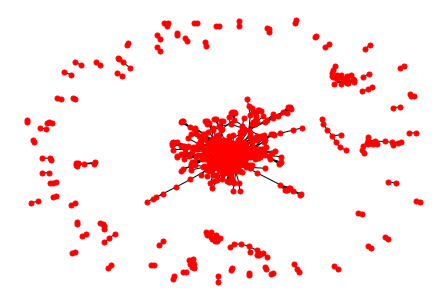

In [260]:
# Общий вид графа
nx.draw(G, node_color='r', node_size=25)

In [276]:
# Функция рисования приближенного графа
def draw_graph(g, title=""):
    plt.figure(figsize=(25,20))
    
    g_coords = nx.spring_layout(g, k=0.15)
    
    nx.draw_networkx_nodes(g, pos=g_coords, node_color='r', node_size=150)
    nx.draw_networkx_edges(g, pos=g_coords, width=.2)
    
    plt.title(title, fontsize = 16)
    plt.axis("off")

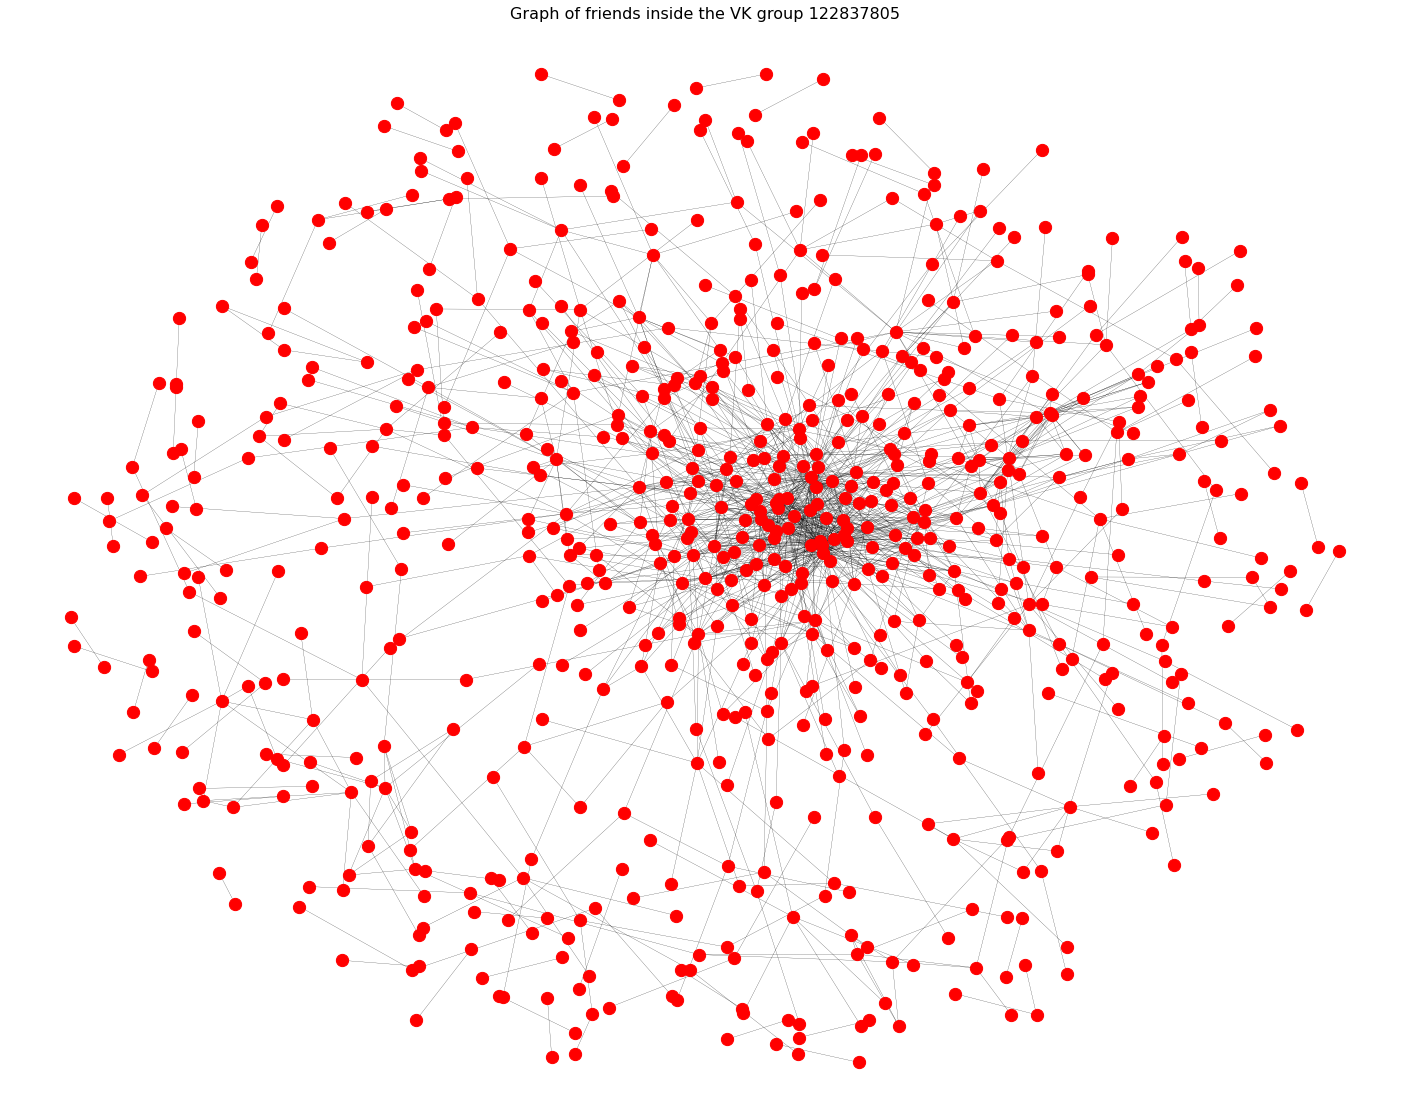

In [262]:
draw_graph(G, "Graph of friends inside the VK group " + str(vk_group))

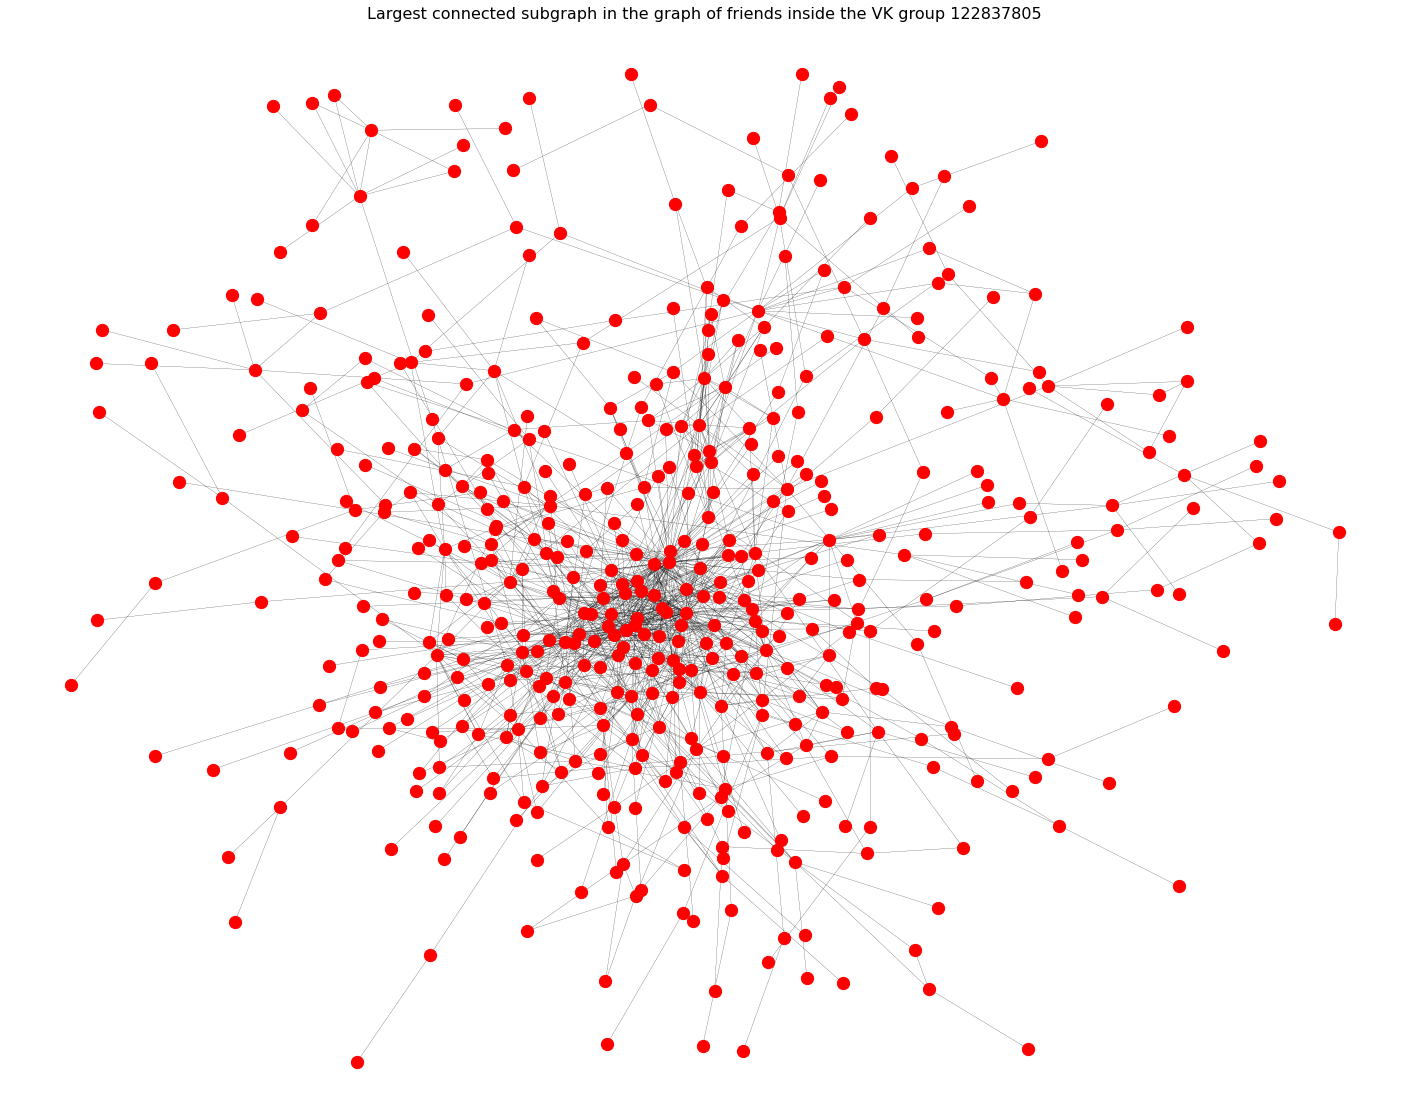

In [263]:
draw_graph(subG, "Largest connected subgraph in the graph of friends inside the VK group " + str(vk_group))

In [264]:
print('Число вершин - ', len(list(subG.nodes())))
print('Число ребер - ', len(list(subG.edges())))

Число вершин -  488
Число ребер -  1177


In [277]:
G.edges()

EdgeView([('6703', '12334563'), ('6703', '1837509'), ('6703', '117931655'), ('6703', '235416266'), ('6703', '54930155'), ('6703', '192311134'), ('12334563', '117931655'), ('54930155', '5656579'), ('54930155', '63952893'), ('192311134', '86557'), ('192311134', '1097148'), ('192311134', '2057180'), ('192311134', '7989763'), ('192311134', '13683482'), ('192311134', '14630059'), ('192311134', '26168138'), ('192311134', '45967240'), ('192311134', '74014037'), ('192311134', '90253736'), ('192311134', '95897938'), ('192311134', '133067249'), ('192311134', '174397776'), ('192311134', '178557624'), ('192311134', '232516882'), ('34802', '7896674'), ('7896674', '22577218'), ('7896674', '60278286'), ('7896674', '84708600'), ('7896674', '109908892'), ('86557', '16421958'), ('86557', '174613047'), ('16421958', '12655684'), ('16421958', '129902587'), ('118902', '160173381'), ('160173381', '136272'), ('160173381', '40221417'), ('160173381', '65122429'), ('160173381', '126147466'), ('160173381', '43718

In [265]:
# Функция построения графика распределения степеней вершин в графе
def draw_nodes_degree_distribution(G):
    er_graph_degrees = {}
    for node in G.nodes:
        er_graph_degrees[G.degree[node]] = er_graph_degrees.get(G.degree[node], 0) + 1
        
    items = sorted(er_graph_degrees.items(), key=lambda item : (item[0], item[1]))
    plt.plot(list(zip(*items))[0], list(zip(*items))[1], color='red')

In [266]:
# Получение коэффициентов схожести графа с моделью Эрдоша-Реньи
def erdos_renyi_similarity(G):
    er_graph = nx.erdos_renyi_graph(len(G), p=0.23)
    
    plt.subplot(1, 2, 1)
    draw_nodes_degree_distribution(er_graph)
    plt.subplot(1, 2, 2)
    draw_nodes_degree_distribution(G)
    plt.show()

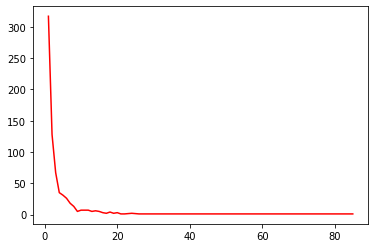

In [267]:
draw_nodes_degree_distribution(G)

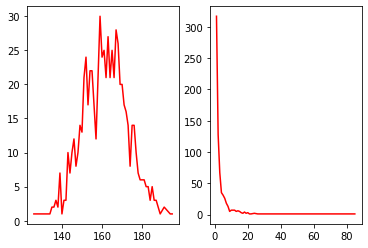

In [268]:
erdos_renyi_similarity(G)

In [269]:
def plot_degree_dist(G):
    in_degrees = G.in_degree()
    in_degrees=dict(in_degrees)
    in_values = sorted(set(in_degrees.values()))
    in_hist = [list(in_degrees.values()).count(x) for x in in_values]

    plt.figure() 
    plt.grid(False)
    plt.loglog(in_values, in_hist, 'r.') 
    #plt.loglog(out_values, out_hist, 'b.') 
    #plt.legend(['In-degree', 'Out-degree'])
    plt.xlabel('k')
    plt.ylabel('p(k)')
    plt.title('Degree Distribution')
    plt.xlim([0, 2*100**1])

In [271]:
# Локальные коэффициенты кластеризации
list(nx.clustering(G).values())
# Глобальный коэффициент кластеризации (высчитанный)
np.mean(list(nx.clustering(G).values()))

0.1455136404866341

In [272]:
#  какой должен быть коэффициент кластеризации
k = pow(len(list(G.nodes())), -0.75)
print(k)

0.0073245931457932975


In [273]:
# Получение коэффициентов для модели Малого мира - 
# λ - нормализованный кратчайший путь и γ - нормализованный коэффициент кластеризации
def small_world_similarity(G):
    L_s, C_s = [], []
    
    L_connected_subgraphs = []
    connected_graphs = list((G.subgraph(c) for c in nx.connected_components(G)))
    for x in connected_graphs:
        path_length = nx.average_shortest_path_length(x)
        L_connected_subgraphs.append(path_length)
    
    L = np.mean(L_connected_subgraphs)
    C = nx.average_clustering(G)
    print('L ', L)
    print('C ', C)
    
    for i in range(10):
        connected_components_count = 10
        while connected_components_count != 1:
            generated_G = nx.watts_strogatz_graph(len(G), 4, 0.6)
            
            A = (generated_G.subgraph(c) for c in nx.connected_components(generated_G))
            A = list(A)
            
            connected_components_count = len(A)
            
        print(nx.number_of_edges(G), nx.number_of_edges(generated_G))
        
        L_s_ = nx.average_shortest_path_length(generated_G)
        C_s_ = nx.average_clustering(generated_G)
        print("L_s ", L_s_)
        print("C_s ", C_s_)
        L_s.append(L_s_)
        C_s.append(C_s_)
    
    lambda_ = L / np.mean(L_s)
    gamma_ = C / np.mean(C_s)
    return lambda_, gamma_

In [274]:
print(small_world_similarity(G))

L  1.257689995764824
C  0.1455136404866341
1343 1406
L_s  5.159714370240686
C_s  0.05062882431303487
1343 1406
L_s  5.176946176946177
C_s  0.048604619657251276
1343 1406
L_s  5.177663493452967
C_s  0.044716521032310524
1343 1406
L_s  5.18043549622497
C_s  0.03638488112172325
1343 1406
L_s  5.173367699683489
C_s  0.048426245794666894
1343 1406
L_s  5.171292750240118
C_s  0.046525096525096545
1343 1406
L_s  5.172164066900909
C_s  0.038962270541217925
1343 1406
L_s  5.1626971100655314
C_s  0.030453385716543616
1343 1406
L_s  5.167078009183272
C_s  0.05122603806814339
1343 1406
L_s  5.14692425218741
C_s  0.029109937004673833
(0.24332206690258637, 3.423545710915314)


In [ ]:
#print ('Диаметр: ', nx.diameter(subG))
#x = nx.all_pairs_shortest_path(subG)
#print (x)
#print ('Среднее расстояние в компоненте сильной связности: ', nx.average_shortest_path_length(subG))
#print ('Среднее расстояние в компоненте слабой связности: ', nx.average_shortest_path_length(subG))